# Exercise C
- This question is intended to be open-ended. What other trends do you observe in the dataset?
- Are there any “nuggets” we could use to enhance our business strategy?

I will check
 - product trend: including type of product, color  and size
 - discount trend
 - repeated customers

In [1]:
import warnings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'Black'

## Read in data

In [2]:
line_items = pd.read_csv('line_items.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

## Join tables

In [3]:
joined_tables1 = orders.merge(line_items, how='outer', on='order_number') \
    .merge(products, how='outer', on='product_id')

In [4]:
missing_line_item_number = joined_tables1.loc[joined_tables1.line_item_number.isnull()].shape[0]
print(round(missing_line_item_number/orders.shape[0] *100,2), '% orders are missing line_items_number')

4.47 % orders are missing line_items_number


In [5]:
# drop missings 
joined_tables1 = joined_tables1[joined_tables1.line_item_number.notnull()].reset_index()

In [6]:
# keep date
joined_tables1['ordered_date'] = joined_tables1.ordered_at_utc.str[:10]

In [7]:
joined_tables1.head()

,index,order_number,ordered_at_utc,customer_uuid,discount,line_item_number,units_sold,product_id,model_number,description,size,color,selling_price,supplier_cost,ordered_date
0,0,148320207,2018-08-10 18:36:00,7.407832e+12,0.02,181686513.0,7.0,569789.0,T1850,Cotton Sweater,XL,BLACK,22.01,8.16,2018-08-10
1,1,152403312,2018-08-29 18:13:00,4.083313e+12,0.06,188522363.0,9.0,569789.0,T1850,Cotton Sweater,XL,BLACK,22.01,8.16,2018-08-29
2,2,181312465,2018-11-20 07:42:00,4.584988e+12,0.06,226444646.0,9.0,569789.0,T1850,Cotton Sweater,XL,BLACK,22.01,8.16,2018-11-20
3,3,77671616,2017-10-06 21:50:00,4.183541e+12,0.08,91741819.0,9.0,569789.0,T1850,Cotton Sweater,XL,BLACK,22.01,8.16,2017-10-06
4,4,152650897,2018-09-04 01:16:00,9.182046e+11,0.10,191205274.0,6.0,569789.0,T1850,Cotton Sweater,XL,BLACK,22.01,8.16,2018-09-04


### Product Trend: What's getting popular?
- better understanding on customers preference helps planning future supply

- color
    - black and white dominate the market

In [12]:
joined_tables1['ordered_month'] = joined_tables1['ordered_date'].str[:7]
color = joined_tables1.groupby(['ordered_month','color'])['units_sold'].agg(np.sum).reset_index()
color = color.pivot(index="ordered_month", columns="color",values="units_sold").reset_index()
color.head()

color,ordered_month,BLACK,NAVY,RED,ROYAL,WHITE
0,2016-12,4041.0,864.0,759.0,737.0,2524.0
1,2017-01,9016.0,1306.0,1623.0,1050.0,6640.0
2,2017-02,10644.0,1562.0,1881.0,1941.0,7701.0
3,2017-03,14295.0,2622.0,3527.0,3098.0,11259.0
4,2017-04,13157.0,2588.0,3714.0,2908.0,12249.0


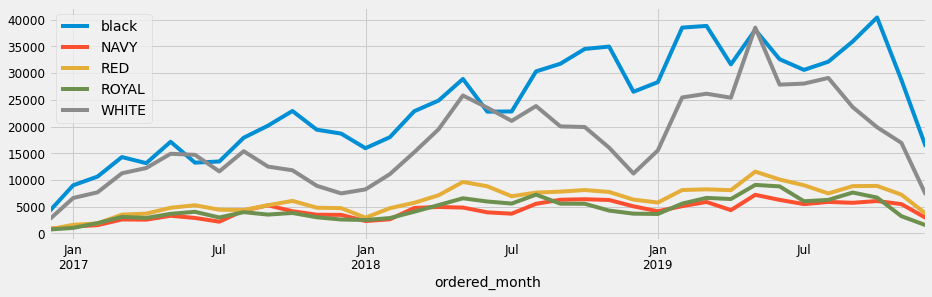

In [17]:
color['ordered_month'] = pd.to_datetime(color['ordered_month'], format='%Y-%m')
color = color.set_index(['ordered_month'])

ax = color.BLACK.plot(label='black', figsize=(14, 4))
color.NAVY.plot(ax=ax, label='NAVY')
color.RED.plot(ax=ax, label='RED')
color.ROYAL.plot(ax=ax, label='ROYAL')
color.WHITE.plot(ax=ax, label='WHITE')
plt.legend()

- product type
    - high volume on cotton T shirts
    - similar seasonal trend for cotton and Ladies Tank
    - opposit trend for cotton sweater

In [18]:
joined_tables1['ordered_month'] = joined_tables1['ordered_date'].str[:7]
desc = joined_tables1.groupby(['ordered_month','description'])['units_sold'].agg(np.sum).reset_index()
desc = desc.pivot(index="ordered_month", columns="description",values="units_sold").reset_index()
desc.columns = ['ordered_month','CottonSweater','CottonTshirt','LadiesTank']
desc.head()

,ordered_month,CottonSweater,CottonTshirt,LadiesTank
0,2016-12,1552.0,7052.0,321.0
1,2017-01,1564.0,16277.0,1794.0
2,2017-02,1201.0,19991.0,2537.0
3,2017-03,1348.0,29101.0,4352.0
4,2017-04,902.0,28435.0,5279.0


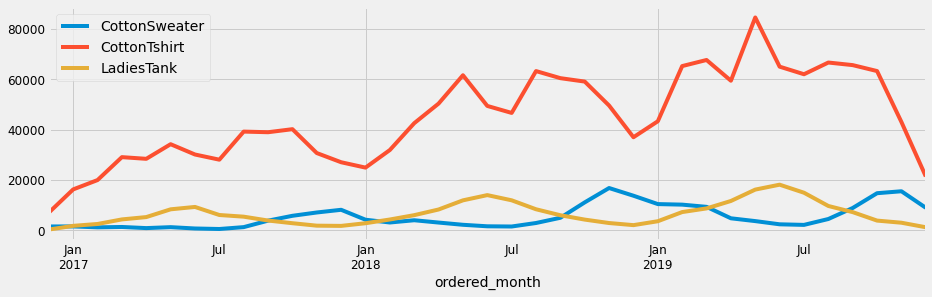

In [19]:
desc['ordered_month'] = pd.to_datetime(desc['ordered_month'], format='%Y-%m')
desc = desc.set_index(['ordered_month'])

ax = desc.CottonSweater.plot(label='CottonSweater', figsize=(14, 4))
desc.CottonTshirt.plot(ax=ax, label='CottonTshirt')
desc.LadiesTank.plot(ax=ax, label='LadiesTank')
plt.legend()


- size

In [28]:
joined_tables1['ordered_month'] = joined_tables1['ordered_date'].str[:7]
size = joined_tables1.groupby(['ordered_month','size'])['units_sold'].agg(np.sum).reset_index()
size = size.pivot(index="ordered_month", columns="size",values="units_sold").reset_index()
size.columns = ['ordered_month','XXL','L','M','S','XL']
size.head()

,ordered_month,XXL,L,M,S,XL
0,2016-12,1362.0,2280.0,1844.0,1269.0,2170.0
1,2017-01,2218.0,5170.0,4573.0,3287.0,4387.0
2,2017-02,2671.0,6260.0,5931.0,3546.0,5321.0
3,2017-03,4200.0,8497.0,8831.0,5234.0,8039.0
4,2017-04,4151.0,9423.0,7582.0,5281.0,8179.0


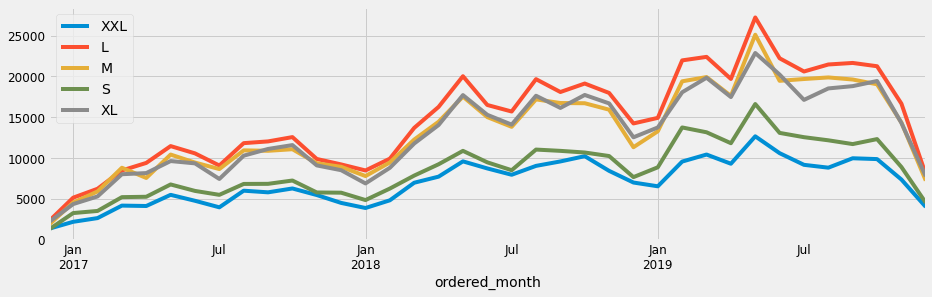

In [29]:
size['ordered_month'] = pd.to_datetime(size['ordered_month'], format='%Y-%m')
size = size.set_index(['ordered_month'])

ax = size.XXL.plot(label='XXL', figsize=(14, 4))
size.L.plot(ax=ax, label='L')
size.M.plot(ax=ax, label='M')
size.S.plot(ax=ax, label='S')
size.XL.plot(ax=ax, label='XL')
plt.legend()

### Revenue trend
 - cotton sweater is the most profitable single item
 - units largely influenced by seasonality but dicount on price may drive the volumn. 
 - price elasticity(price and volumn dynamics) help us opimize profit

In [55]:
joined_tables1['ordered_month'] = joined_tables1['ordered_date'].str[:7]
def f(x):
    d = {}
    d['price'] = ((1-x['discount']) * x['units_sold'] * x['selling_price']).sum()/(x['units_sold']).sum()
    d['disc'] = ((x['discount']) * x['units_sold']).sum()/(x['units_sold']).sum()
    d['units'] = (x['units_sold']).sum()
    d['profit'] = ((1-x['discount']) * x['units_sold'] * x['selling_price'] - x['units_sold'] * x['supplier_cost']).sum()
    d['profit_item'] = ((1-x['discount']) * x['units_sold'] * x['selling_price'] - x['units_sold'] * x['supplier_cost']).sum() / (x['units_sold']).sum()
    return pd.Series(d, index=['price', 'units', 'disc', 'profit', 'profit_item'])
price = joined_tables1.groupby(['ordered_month','description']).apply(f).reset_index()
price['month'] = 'M' + price['ordered_month'].str[5:] 
price.head()

,ordered_month,description,price,units,disc,profit,profit_item,month
0,2016-12,Cotton Sweater,21.332751,1552.0,0.040245,20093.8600,12.947075,M12
1,2016-12,Cotton T-shirt,5.226181,7052.0,0.023500,22466.3784,3.185817,M12
2,2016-12,Ladies Tank,4.878361,321.0,0.008847,922.0640,2.872474,M12
3,2017-01,Cotton Sweater,21.403482,1564.0,0.033120,20393.6266,13.039403,M01
4,2017-01,Cotton T-shirt,5.040826,16277.0,0.023889,50170.1324,3.082271,M01


Text(0, 0.5, 'discount')

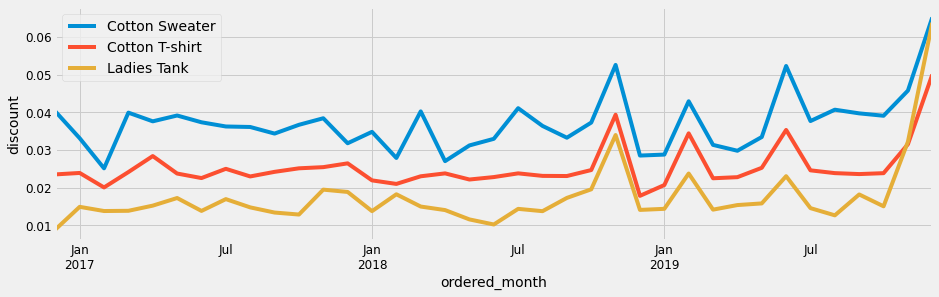

In [56]:
price['ordered_month'] = pd.to_datetime(price['ordered_month'], format='%Y-%m')
sweater = price[price.description == 'Cotton Sweater']
tshirt = price[price.description == 'Cotton T-shirt']
tank = price[price.description == 'Ladies Tank']
sweater = sweater.set_index(['ordered_month'])
tshirt = tshirt.set_index(['ordered_month'])
tank = tank.set_index(['ordered_month'])

ax = sweater.disc.plot(label='Cotton Sweater', figsize=(14, 4))
tshirt.disc.plot(ax=ax, label='Cotton T-shirt')
tank.disc.plot(ax=ax, label='Ladies Tank')
plt.legend()
plt.ylabel('discount')

Text(0, 0.5, 'units')

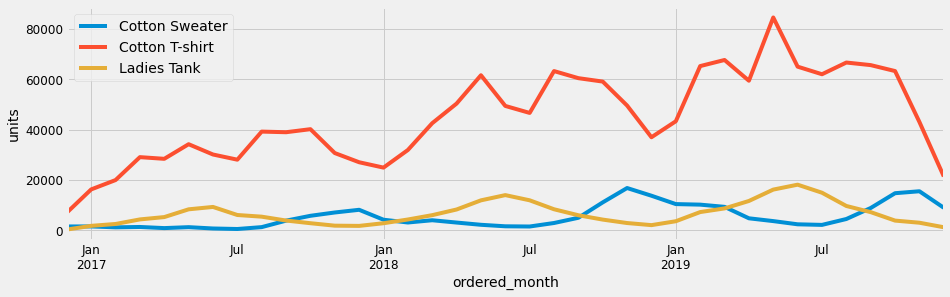

In [57]:
ax = sweater.units.plot(label='Cotton Sweater', figsize=(14, 4))
tshirt.units.plot(ax=ax, label='Cotton T-shirt')
tank.units.plot(ax=ax, label='Ladies Tank')
plt.legend()
plt.ylabel('units')

Text(0, 0.5, 'profit per item')

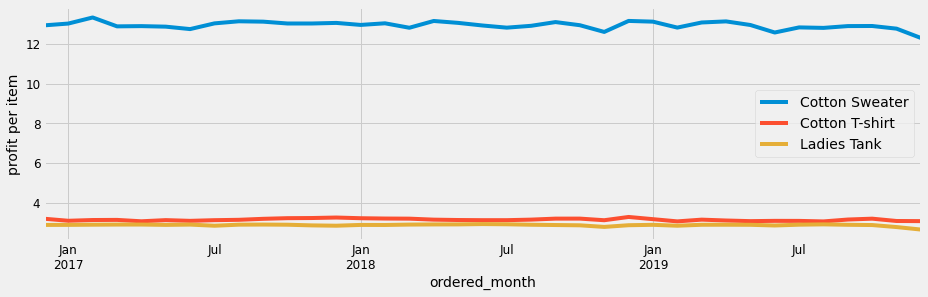

In [58]:
ax = sweater.profit_item.plot(label='Cotton Sweater', figsize=(14, 4))
tshirt.profit_item.plot(ax=ax, label='Cotton T-shirt')
tank.profit_item.plot(ax=ax, label='Ladies Tank')
plt.legend()
plt.ylabel('profit per item')

Text(0, 0.5, 'profit')

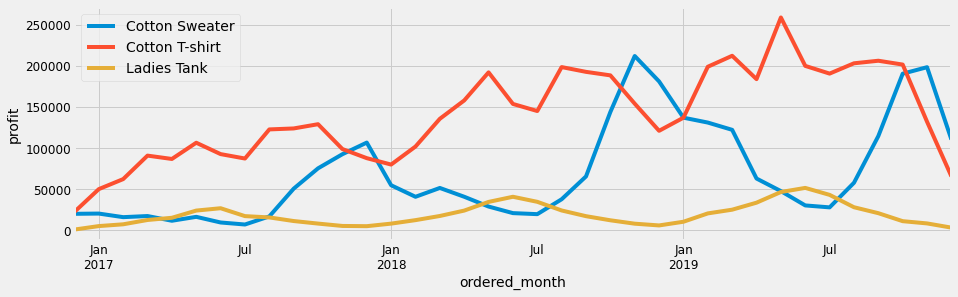

In [59]:
ax = sweater.profit.plot(label='Cotton Sweater', figsize=(14, 4))
tshirt.profit.plot(ax=ax, label='Cotton T-shirt')
tank.profit.plot(ax=ax, label='Ladies Tank')
plt.legend()
plt.ylabel('profit')

- price elasticity

In [62]:
X = price[price.description=='Cotton Sweater'][['price','month']]
X = pd.get_dummies(X, drop_first=False)
y = (price[price.description=='Cotton Sweater']['units'])
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
print('Cotton Sweater')
print('R2: ', reg.score(X, y))
print('price_coef:', reg.coef_[0])

Cotton Sweater
R2:  0.6164486839313565
price_coef: -4444.235944936876


In [63]:
X = price[price.description=='Cotton T-shirt'][['price','month']]
X = pd.get_dummies(X, drop_first=False)
y = price[price.description=='Cotton T-shirt']['units']
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
print('Cotton T-shirt')
print('R2: ', reg.score(X, y))
print('price_coef:', reg.coef_[0])

Cotton T-shirt
R2:  0.40728507032579675
price_coef: -34324.93778875893


In [64]:
X = price[price.description=='Ladies Tank'][['price','month']]
X = pd.get_dummies(X, drop_first=False)
y = price[price.description=='Ladies Tank']['units']
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
print('Ladies Tank')
print('R2: ', reg.score(X, y))
print('price_coef:', reg.coef_[0])

Ladies Tank
R2:  0.765360728537638
price_coef: -728.3823848801525


### customer value
5% high value customer generate 27% revenue

In [303]:
orders['ordered_date'] = orders.ordered_at_utc.str[:10]
repeated = orders.groupby('customer_uuid')['order_number'].count().reset_index() \
    .groupby('order_number')['customer_uuid'].count().reset_index() \
    .sort_values('order_number', ascending=False)

repeated['dist_customers_cumsum'] = repeated['customer_uuid'].cumsum()
repeated['conversion'] = 1 - repeated['customer_uuid']/repeated['dist_customers_cumsum']
repeated.sort_values('order_number').head(10)

,order_number,customer_uuid,dist_customers_cumsum,conversion
0,1,41845,58292,0.282148
1,2,8499,16447,0.483249
2,3,3246,7948,0.591595
3,4,1628,4702,0.653764
4,5,956,3074,0.689005
5,6,574,2118,0.728990
6,7,379,1544,0.754534
7,8,283,1165,0.757082
8,9,202,882,0.770975
9,10,131,680,0.807353


In [71]:
print('%customers with more than 5 orders:', round(3074/58292*100,1), "%")

%customers with more than 5 orders: 5.3 %


In [72]:
# revenue from loyal customer who purchase more than 5
cust = orders.groupby('customer_uuid')['order_number'].count().reset_index() 
cust = cust[cust.order_number >= 5][['customer_uuid']]
revenue_loyal = joined_tables1.merge(cust, on='customer_uuid', how='inner')

temp = ((1-revenue_loyal['discount']) * revenue_loyal['units_sold'] * revenue_loyal['selling_price']).sum() / \
((1-joined_tables1['discount']) * joined_tables1['units_sold'] * joined_tables1['selling_price']).sum()

print(round(temp*100,1), '%', ' revenue generated by customers with at least 5 orders')

27.3 %  revenue generated by customers with at least 5 orders


### comments
5% customer generate 27% revenue, how to increase customer retetion, especially convert first buyer to repeated buyer